**Your Name**: **Duncan**

<div style="background-color:#f2d7d5">

# Assignment 9: Pandas Merging DataFrames, Summaries, and Visualization
## Instructions:
- Work with your assigned group to submit a single document, although all group members will submit their own assignments on blackboard
- Due date: Friday April 28 by 7:00pm
- Your Jupyter notebook file (it has an `ipynb` extension) must be uploaded using Blackboard Assignments.
- Please start work ASAP as technical difficulties may arise requiring a little time to resolve.
- Post any problems you encounter on the course [issue tracker](https://code.wm.edu/econ/160/issues/-/issues).


<div style="background-color:#f2d7d5">

## Rating students in your group

For each person in your group, please provide a rating of your fellow group members' contributions to this assignment.  The rating is on a five point scale, as follows:

- `1` : group member did much less than their share of the work
- `2` : group member did less than their share of the work
- `3` : group member did their share of the work 
- `4` : group member did more than their share of the work
- `5` : group member did much more than their share of the work.

For each member of your group (excluding yourself), enter your rating:

- Name: Thomas,    Rating: 3
- Name: Peter,    Rating: 3

<div style="background-color:#f2d7d5">

**General instructions for this assignment** 
- Use comments to annotate and explain the steps in your code.
- Some of the work on this assignment will require you to expand beyond what we've covered in class, so you might need to do some web searching.
- Do not under any circumstances reorder, reformat, or change the instruction cells (the ones in light red)

In the code cell below, we import all the python packages that we'll need for this notebook:

In [ ]:
# we will be using geopandas
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<div style="background-color:#f2d7d5">
    
The following installs US Census maps for states and counties obtained from the official [US Census GeoSpatial webpage](https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html). 
    
Note: if you move this notebook you must also move the `data` folder and all contents to the new location. This code is **only** guaranteed to work on `jupyterhub` or a linux machine (and probably a mac). You are not required to understand the code, but it is

1. Creating the `data` directory if it doesn't exist
2. Downloading the map data
3. Since the data is a zip file, unzip the data
4. Move back to the original folder location

In [ ]:
# Run this, but not required to know what it is doing
import os as os

# create data directory if it doesn't exist 
try:
    os.mkdir('./data')
except:
    None
# move to data directory    
_ = os.chdir('./data')
# download the geospatial files into data directory
_ = os.system('wget https://econ.pages.code.wm.edu/160/python/data/cb_2018_us_county_5m.zip')
_ = os.system('wget https://econ.pages.code.wm.edu/160/python/data/cb_2018_us_nation_5m.zip')
# unzip 
_ = os.system('unzip cb_2018_us_county_5m.zip')
_ = os.system('unzip cb_2018_us_nation_5m.zip')
# move back to parent directory
_ = os.chdir('..')

In [ ]:
import pandas as pd
import geopandas as gpd

# Using seaborn styles really improves plotting in my opinion
# There are five preset seaborn themes: darkgrid, whitegrid, dark, white, and ticks
import seaborn as sbn
sbn.set_style(style='white')

<div style="background-color:#f2d7d5">

This week we'll again be using data from the US Acid Rain Program, a pollution permit trading program for meeting aggressive sulfur oxide reductions aimed at reducing acid rain.  The Acid Rain Program is **the world's first** experiment in cap and trade (or pollution permit trading).  All participants in the Acid Rain Program are **electrical power generation facilities**.

The data source is [the clean air markets program data website at the EPA](https://campd.epa.gov/).

In [ ]:
emissions = pd.read_csv('https://econ.pages.code.wm.edu/160/python/data/monthly-emissions-epa.csv', low_memory=False)

<div style="background-color:#f2d7d5">

We will also be opening the `facilities` dataframe that has detailed information about each polluting unit.

In [ ]:
facilities = pd.read_csv('https://econ.pages.code.wm.edu/160/python/data/facility-attributes-epa.csv')

The [data dictionaries from the EPA](https://campd.epa.gov/help-support/glossary) for these files can be found in the following two dataframes:

In [ ]:
emissions_ddict = pd.read_excel('https://econ.pages.code.wm.edu/160/python/data/clean_air_program_data_dictionary.xlsx',
                                sheet_name='Monthly Emissions', skiprows=1)
emissions_ddict.head(30)


,Data Label,JSON Property Label,Example Value,Definition
0,Associated Stacks,associatedStacks,CS001,Stacks associated with the unit
1,CO2 Mass (short tons),co2Mass,153926.5,CO2 mass emissions (short tons)
2,CO2 Rate (short tons/mmBtu),co2Rate,0.103,Average CO2 hourly emissions rate (short tons/...
3,Facility ID,facilityId,3,The Facility ID code assigned by the Departmen...
4,Facility Name,facilityName,Barry,The name given by the owners and operators to ...
5,Gross Load (MWh),grossLoad,164349.0,Electrical generation in MW produced by combus...
6,Heat Input (mmBtu),heatInput,1500254.0,Quantity of heat in mmBtu calculated by multip...
7,Hg Controls,hgControlInfo,"Catalyst (gold, palladium, or other) used to o...",Method or equipment used by the combustion uni...
8,Month,month,December,Month on which activity occurred.
9,NOx Controls,noxControlInfo,"Selective Catalytic Reduction, Low NOx Burner ...",Method or equipment used by the combustion uni...


In [ ]:
facilities_ddict = pd.read_excel('https://econ.pages.code.wm.edu/160/python/data/clean_air_program_data_dictionary.xlsx',
                                sheet_name='FacilityUnit Attr', skiprows=1)
facilities_ddict.head(30)

,Data Label,JSON Property Label,Example Value,Definition
0,Associated Stacks,assocStacks,CS1,Stacks associated with the unit.
1,Commercial Operation Date,commercialOperationDate,1977-04-01,"The date a unit began, or will begin to genera..."
2,County,county,Sherburne County,The county within a state in which a unit is o...
3,County Code,countyCode,MN141,The numerical code identifying a specific coun...
4,EPA Region,epaRegion,5,An EPA Region is a group of U.S. states. EPA R...
5,Facility ID,facilityId,6090,The Facility ID code assigned by the Departmen...
6,Facility Name,facilityName,Sherburne County,The name given by the owners and operators to ...
7,FIPS Code,fipsCode,141,The Federal Information Processing Standards (...
8,Generator ID,generatorId,1,One or more unique identifiers for generators ...
9,Hg Controls,hgControlInfo,Halogenated PAC Sorbent Injection,Method or equipment used by the combustion uni...


<div style="background-color:#f2d7d5">

# Part A: Data Cleanup and Data Prep

<div style="background-color:#f2d7d5">

Using code from the previous assignment clean the columns in the `emissions` dataframe.




In [ ]:
emissions.columns = [i.replace(" ", "_").lower().replace(")","").replace("(","").replace("'","").\
                   replace(",","").replace("/mmbtu","").replace("_1000_lb","").replace("_lbs","").\
                     replace("co2_rate_short_tons","co2_rate") for i in emissions.columns.to_list()]
emissions.columns

Index(['state', 'facility_name', 'facility_id', 'unit_id', 'associated_stacks',
       'year', 'month', 'operating_time_count', 'sum_of_the_operating_time',
       'gross_load_mwh', 'steam_load', 'so2_mass_short_tons', 'so2_rate',
       'co2_mass_short_tons', 'co2_rate', 'nox_mass_short_tons', 'nox_rate',
       'heat_input_mmbtu', 'primary_fuel_type', 'secondary_fuel_type',
       'unit_type', 'so2_controls', 'nox_controls', 'pm_controls',
       'hg_controls', 'program_code'],
      dtype='object')

<div style="background-color:#f2d7d5">

- Include a datetime column called `date` based on `year` and `month` as we did in the previous assignment.

In [ ]:
emissions_datetime = pd.to_datetime(dict(year=emissions.year, month=emissions.month, day = 1))
emissions['date'] = emissions_datetime

<div style="background-color:#f2d7d5">

- Again using findings from the previous assignment, what is the unit of analysis of this dataframe (what is each row describing?)

This dataframe has monthly emission rates and totals for various pollutants (carbon and sulfur oxides) for each pollution source in the US.

<div style="background-color:#f2d7d5">

Clean and inventory the `facility` dataframe.

- clean the facility variable names


    

In [ ]:
facilities.columns.to_list()

['State',
 'Facility Name',
 'Facility ID',
 'Unit ID',
 'Associated Stacks',
 'Year',
 'Program Code',
 'Primary Rep Info',
 'EPA Region',
 'NERC Region',
 'County',
 'County Code',
 'FIPS Code',
 'Source Category',
 'Latitude',
 'Longitude',
 'Owner/Operator',
 'SO2 Phase',
 'NOx Phase',
 'Unit Type',
 'Primary Fuel Type',
 'Secondary Fuel Type',
 'SO2 Controls',
 'NOx Controls',
 'PM Controls',
 'Hg Controls',
 'Commercial Operation Date',
 'Operating Status',
 'Max Hourly HI Rate (mmBtu/hr)',
 'Associated Generators & Nameplate Capacity (MWe)']

In [ ]:
facilities.columns = [i.replace(" ", "_").lower().replace(")","").replace("(","").replace("'","").\
                   replace(",","").replace("_mmbtu/hr","").replace("_mwe","") for i in facilities.columns.to_list()]
facilities.columns

Index(['state', 'facility_name', 'facility_id', 'unit_id', 'associated_stacks',
       'year', 'program_code', 'primary_rep_info', 'epa_region', 'nerc_region',
       'county', 'county_code', 'fips_code', 'source_category', 'latitude',
       'longitude', 'owner/operator', 'so2_phase', 'nox_phase', 'unit_type',
       'primary_fuel_type', 'secondary_fuel_type', 'so2_controls',
       'nox_controls', 'pm_controls', 'hg_controls',
       'commercial_operation_date', 'operating_status', 'max_hourly_hi_rate',
       'associated_generators_&_nameplate_capacity'],
      dtype='object')

<div style="background-color:#f2d7d5">
    
Examine datatypes for each column

In [ ]:
facilities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77852 entries, 0 to 77851
Data columns (total 30 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   state                                       77852 non-null  object 
 1   facility_name                               77852 non-null  object 
 2   facility_id                                 77852 non-null  int64  
 3   unit_id                                     77852 non-null  object 
 4   associated_stacks                           11271 non-null  object 
 5   year                                        77852 non-null  int64  
 6   program_code                                77852 non-null  object 
 7   primary_rep_info                            77472 non-null  object 
 8   epa_region                                  77852 non-null  int64  
 9   nerc_region                                 41995 non-null  object 
 10  county    

<div style="background-color:#f2d7d5">
    
Investigate the geographic and temporal extent of the data    

In [ ]:
len(facilities.state.value_counts())

49

In [ ]:
facilities.year.value_counts()

2012    3664
2011    3641
2013    3638
2010    3627
2014    3598
2009    3585
2008    3580
2007    3539
2015    3537
2006    3481
2005    3462
2016    3453
2017    3416
2018    3416
2004    3407
2019    3362
2003    3341
2020    3320
2021    3295
2022    3284
2002    3143
2001    2732
2000    2331
Name: year, dtype: int64

There are 50 state values (one for each state) and the data covers 2000-2022.

<div style="background-color:#f2d7d5">

Summarize the dataframe

In [ ]:
facilities.describe()

,facility_id,year,epa_region,fips_code,latitude,longitude,max_hourly_hi_rate
count,77852.000000,77852.000000,77852.000000,77838.000000,77838.000000,77838.000000,73178.000000
mean,22459.298567,2011.227483,5.157465,96.946042,36.991306,-90.553424,2223.542175
std,36449.899476,6.411120,2.087490,92.535880,4.756448,12.752376,2211.187909
min,3.000000,2000.000000,1.000000,1.000000,24.563600,-124.210300,1.000000
25%,2322.000000,2006.000000,4.000000,31.000000,33.330300,-96.126400,832.000000
50%,6249.000000,2011.000000,5.000000,77.000000,37.788900,-87.923300,1690.000000
75%,55199.000000,2017.000000,6.000000,139.000000,40.719700,-81.613000,2500.000000
max,880001.000000,2022.000000,10.000000,760.000000,48.990500,-68.710600,63333.000000


<div style="background-color:#f2d7d5">

Describe the unit of analysis for the facilities dataframe.  

The facilities data has annual observations per polluting unit.

<div style="background-color:#f2d7d5">

## Part B: Merging `emissions` and `facilities`.

<div style="background-color:#f2d7d5">

Among other things, we want to visualize the spatial distribution of polluting facilities.  To do that we need to link the pollution data in `emissions` to the spatial location (in `latitude` and `longitude`) in `facilities` for each unit.  We want to be able to construct a map for a given state and month, plotting emissions data for each unit, by adding `latitude` and `longitude` to emissions so we can construct the map.
    
To that end, what is the unit of analysis needed for the merged data (what will a row represent after your merge the `facilities` and `emissions` dataframes)?

Unit of Analysis: monthly emission rates and totals for various pollutants (carbon and sulfur oxides) for each pollution source in the US labeled by longitude and latitude.

In [ ]:
emissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913092 entries, 0 to 913091
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   state                      913092 non-null  object        
 1   facility_name              913092 non-null  object        
 2   facility_id                913092 non-null  int64         
 3   unit_id                    913092 non-null  object        
 4   associated_stacks          133137 non-null  object        
 5   year                       913092 non-null  int64         
 6   month                      913092 non-null  int64         
 7   operating_time_count       900945 non-null  float64       
 8   sum_of_the_operating_time  900634 non-null  float64       
 9   gross_load_mwh             729405 non-null  float64       
 10  steam_load                 26983 non-null   float64       
 11  so2_mass_short_tons        755425 non-null  float64 

In [ ]:
facilities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77852 entries, 0 to 77851
Data columns (total 30 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   state                                       77852 non-null  object 
 1   facility_name                               77852 non-null  object 
 2   facility_id                                 77852 non-null  int64  
 3   unit_id                                     77852 non-null  object 
 4   associated_stacks                           11271 non-null  object 
 5   year                                        77852 non-null  int64  
 6   program_code                                77852 non-null  object 
 7   primary_rep_info                            77472 non-null  object 
 8   epa_region                                  77852 non-null  int64  
 9   nerc_region                                 41995 non-null  object 
 10  county    

<div style="background-color:#f2d7d5">

What variables in `emissions` and `facilities` will allow you to merge the dataframe (what are the `keys`)?

state, facility_name, facility_id, year

<div style="background-color:#f2d7d5">
    
Based on your findings above, preview your merge operation.

Note we will need only the following fields from `facilities`:
- `facility_id`
- `unit_id`
- `year`
- `latitude`
- `longitude`    

Note we will need only the following fields from `emissions`:
- `facility_id`
- `unit_id`
- `year`
- `so2_mass_short_tons`
- `co2_mass_short_tons`
- `primary_fuel_type`
- `gross_load_mwh`        
    


In [ ]:
facilities = facilities[['latitude','longitude', 'year','unit_id','facility_id', 'state']]

In [ ]:
emissions = emissions[['facility_id', 'unit_id', 'year', 'so2_mass_short_tons', 'co2_mass_short_tons', 'primary_fuel_type', 'gross_load_mwh', 'date', 'state']]

In [ ]:
emissions.merge(facilities, on=['facility_id', 'unit_id','year', 'state'], how='left', indicator = True)

,facility_id,unit_id,year,so2_mass_short_tons,co2_mass_short_tons,primary_fuel_type,gross_load_mwh,date,state,latitude,longitude,_merge
0,3,1,2000,478.678,83917.785,Coal,92317.50,2000-01-01,AL,31.0069,-88.0103,both
1,3,1,2000,517.436,90844.948,Coal,99127.00,2000-02-01,AL,31.0069,-88.0103,both
2,3,1,2000,527.169,96984.684,Coal,100505.50,2000-03-01,AL,31.0069,-88.0103,both
3,3,1,2000,574.762,102502.479,Coal,103279.00,2000-04-01,AL,31.0069,-88.0103,both
4,3,1,2000,514.626,88523.910,Coal,86209.00,2000-05-01,AL,31.0069,-88.0103,both
...,...,...,...,...,...,...,...,...,...,...,...,...
913087,70454,MAG2,2022,0.129,25574.007,Pipeline Natural Gas,34617.37,2022-08-01,GA,34.3387,-82.8207,both
913088,70454,MAG2,2022,0.076,15053.321,Pipeline Natural Gas,20259.14,2022-09-01,GA,34.3387,-82.8207,both
913089,70454,MAG2,2022,0.036,7185.953,Pipeline Natural Gas,9493.64,2022-10-01,GA,34.3387,-82.8207,both
913090,70454,MAG2,2022,0.050,9889.235,Pipeline Natural Gas,13738.16,2022-11-01,GA,34.3387,-82.8207,both


<div style="background-color:#f2d7d5">
    
Preview your merge operation (make sure `indicator=True` in the merge method) and count the occurences of each type of merge indicator.  Think about your results and comment on whether this report confirms your merge is working.

In [ ]:
emissions.merge(facilities, on=['facility_id', 'unit_id','year', 'state'], how='left', indicator = True).value_counts('_merge')

_merge
both          913092
left_only          0
right_only         0
dtype: int64

This is good that all merges are from both as that means each row from emissions was matched to a row from facilities.

<div style="background-color:#f2d7d5">

Once you are happy with your result, create a new dataframe (`emissions_`) that has the newly merged lat,lon fields.

In [ ]:
emissions_ = emissions.merge(facilities, on=['facility_id', 'unit_id','year', 'state'], how='left', indicator = True)

<div style="background-color:#f2d7d5">

As a final check, compare summaries and rows of data in `emissions` and `emissions_` to ensure the merge hasn't fundamentally altered your monthly emissions data in unexpected ways. Apart from having the new latitude and longitude data the original columns in `emissions` should be identical to those in `emissions_`.

In [ ]:
emissions.head().describe()

,facility_id,year,so2_mass_short_tons,co2_mass_short_tons,gross_load_mwh
count,5.0,5.0,5.000000,5.000000,5.000000
mean,3.0,2000.0,522.534200,92554.761200,96287.600000
std,0.0,0.0,34.500442,7286.114978,6929.509699
min,3.0,2000.0,478.678000,83917.785000,86209.000000
25%,3.0,2000.0,514.626000,88523.910000,92317.500000
50%,3.0,2000.0,517.436000,90844.948000,99127.000000
75%,3.0,2000.0,527.169000,96984.684000,100505.500000
max,3.0,2000.0,574.762000,102502.479000,103279.000000


In [ ]:
emissions_.head().describe()

,facility_id,year,so2_mass_short_tons,co2_mass_short_tons,gross_load_mwh,latitude,longitude
count,5.0,5.0,5.000000,5.000000,5.000000,5.0000,5.0000
mean,3.0,2000.0,522.534200,92554.761200,96287.600000,31.0069,-88.0103
std,0.0,0.0,34.500442,7286.114978,6929.509699,0.0000,0.0000
min,3.0,2000.0,478.678000,83917.785000,86209.000000,31.0069,-88.0103
25%,3.0,2000.0,514.626000,88523.910000,92317.500000,31.0069,-88.0103
50%,3.0,2000.0,517.436000,90844.948000,99127.000000,31.0069,-88.0103
75%,3.0,2000.0,527.169000,96984.684000,100505.500000,31.0069,-88.0103
max,3.0,2000.0,574.762000,102502.479000,103279.000000,31.0069,-88.0103


All columns are the same except for the additional latitude and longitude in emissions_

<div style="background-color:#f2d7d5">

## Part C: Mapping polluters and emissions in Virginia    

<div style="background-color:#f2d7d5">
    
Next we will use `geopandas` to plot the emissions data.  Using techniques described in class, create a geopandas dataframe for plotting (call it `emissions_geo`).  Preview the results using `head` and see what additional information is added to your dataframe (hopefully geospatial information).

> When you create your `geopandas` dataframe, use the `geometry=gpd.points_from_xy` option (this is a geopandas function for creating a spatial information from latitude and logitude coordinates) that you will need to google for syntax details.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
geometry = gpd.points_from_xy(emissions_['longitude'], emissions_['latitude'])

In [ ]:
emissions_geo = gpd.GeoDataFrame(emissions_, geometry=geometry)
emissions_geo.head()

,facility_id,unit_id,year,so2_mass_short_tons,co2_mass_short_tons,primary_fuel_type,gross_load_mwh,date,state,latitude,longitude,_merge,geometry
0,3,1,2000,478.678,83917.785,Coal,92317.5,2000-01-01,AL,31.0069,-88.0103,both,POINT (-88.01030 31.00690)
1,3,1,2000,517.436,90844.948,Coal,99127.0,2000-02-01,AL,31.0069,-88.0103,both,POINT (-88.01030 31.00690)
2,3,1,2000,527.169,96984.684,Coal,100505.5,2000-03-01,AL,31.0069,-88.0103,both,POINT (-88.01030 31.00690)
3,3,1,2000,574.762,102502.479,Coal,103279.0,2000-04-01,AL,31.0069,-88.0103,both,POINT (-88.01030 31.00690)
4,3,1,2000,514.626,88523.910,Coal,86209.0,2000-05-01,AL,31.0069,-88.0103,both,POINT (-88.01030 31.00690)


<div style="background-color:#f2d7d5">
    
Use the state-level shapefile we downloaded at the top of this notebook (`cb_2018_us_nation_5m.shp`).  Zoom/restrict the plot to the lower 48.
    
Note:
    
1. The plot x and y limits can be set by "setting xlimits".  Since the units are in lat/lon coordinates, it should be easy to adjust this.
2. Another option is to look inside the geodataframe and limit it to states using row subsetting techniques we use just like in pandas

<Axes: >

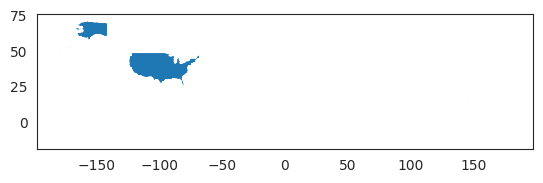

In [ ]:
nation = gpd.read_file('data/cb_2018_us_nation_5m.shp')
nation.plot()

In [ ]:
nation.head()

,AFFGEOID,GEOID,NAME,geometry
0,0100000US,US,United States,"MULTIPOLYGON (((179.48246 51.98283, 179.48656 ..."


Text(0.5, 1.0, 'Lower 48 States')

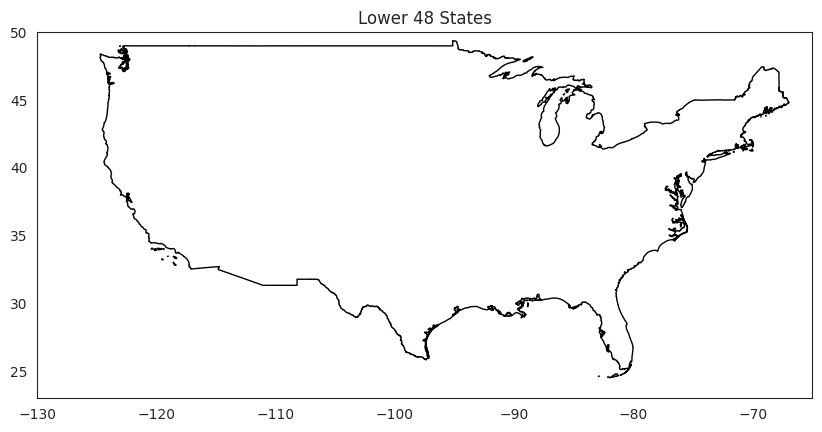

In [ ]:
#Restrict to the lower 48
lower48 = nation.loc[~nation['NAME'].isin(['Alaska', 'Hawaii'])]

#Plot the lower 48
fig, ax = plt.subplots(1,1, figsize=(10, 10))
lower48.plot(ax=ax, color='white', edgecolor='black')

#Set the x and y limits of the plot to focus on the lower 48 states
ax.set_xlim([-130, -65])
ax.set_ylim([23, 50])

#Add a title to the plot
ax.set_title('Lower 48 States')

<div style="background-color:#f2d7d5">
    
Next, plot your emissions points for August 2022 on top of your US map.

In [ ]:
#merge on common variable geometry
nation_plot = nation.merge(emissions_geo, on = ['geometry'], how = 'right')

In [ ]:
#create August 2022 emissions points not including Hawaii and Alaska
emissions_points = nation_plot.query("date == '2022-08' and state != 'HI' and state != 'AK'")[['state']].value_counts().reset_index()

In [ ]:
#merge August 2022 emissions points to nation
state_plot = nation_plot.merge(emissions_points, on = ['state'], how = 'left')

In [ ]:
#rename merged emission point totals to count 
state_plot.rename(columns = {0: 'count'}, inplace = True)

<Axes: >

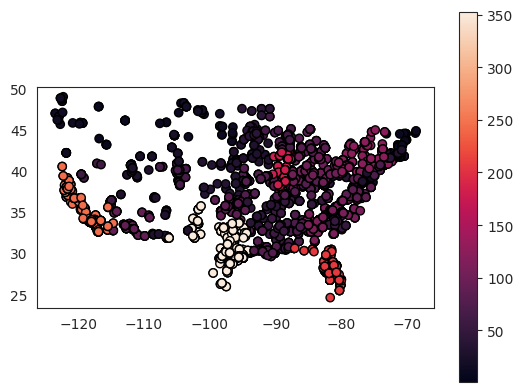

In [ ]:
#preview emissions points for August 2022
state_plot.query("date == '2022-08'").plot(column='count', edgecolor='black',legend=True)

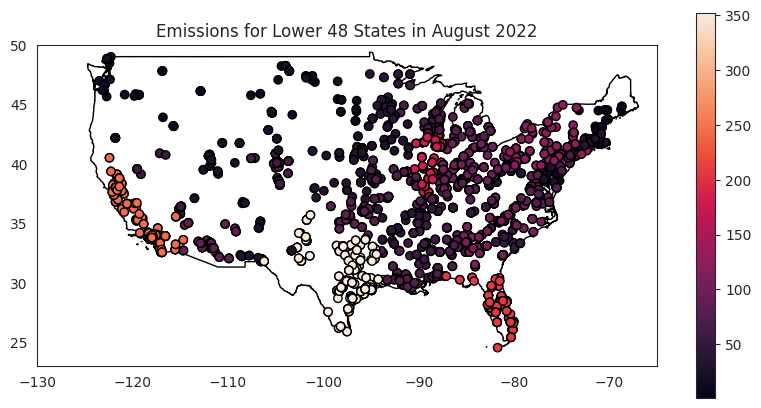

In [ ]:
#Plot August 2022 emissions points onto lower 48 outline

#Restrict to the lower 48
lower48 = nation.loc[~nation['NAME'].isin(['Alaska', 'Hawaii'])]

#Plot the lower 48
fig, ax = plt.subplots(1,1, figsize=(10, 10))
lower48.plot(ax=ax, color='white', edgecolor='black')

#Plot emissions points on lower 48 outline by adding "ax=ax"; make legend smaller with last piece of code
state_plot.query("date == '2022-08'").plot(ax = ax, column='count', edgecolor='black',legend=True, legend_kwds={'shrink': 0.5})

#Set the x and y limits of the plot to focus on the lower 48 states
ax.set_xlim([-130, -65])
ax.set_ylim([23, 50])

#Add a title to the plot
ax.set_title('Emissions for Lower 48 States in August 2022')

#show plot
plt.show()

<div style="background-color:#f2d7d5">
    
Zoom into the Mid-Atlantic region and examine geographical distribution by `primary_fuel_type` by **coloring** the points by fuel type and providing a legend.
    
> Note: for map aesthetics, you might need to get into the underbelly of `matplotlib` (what `geopandas` is using to draw the plots). You might need to search for legend options such as `loc` (where it is drawn in the figure), `fontsize` (size of fonts in the legend), and perhaps `ncols` (number of columns in the legend).  These are used by `geopandas` using `legend_kwds`.

In [ ]:
# Subset emissions dataframe to mid-atlantic states
mid_atlantic_states = ['PA', 'DE', 'MD', 'VA', 'WV', 'NJ', 'NY']
mid_atlantic_emissions = state_plot.loc[state_plot['state'].isin(mid_atlantic_states)]

# Create GeoDataFrame with Mid-Atlantic emissions coordinates
ma_geometry = gpd.points_from_xy(mid_atlantic_emissions['longitude'], mid_atlantic_emissions['latitude'])
ma_emissions_geo = gpd.GeoDataFrame(mid_atlantic_emissions, geometry=ma_geometry)

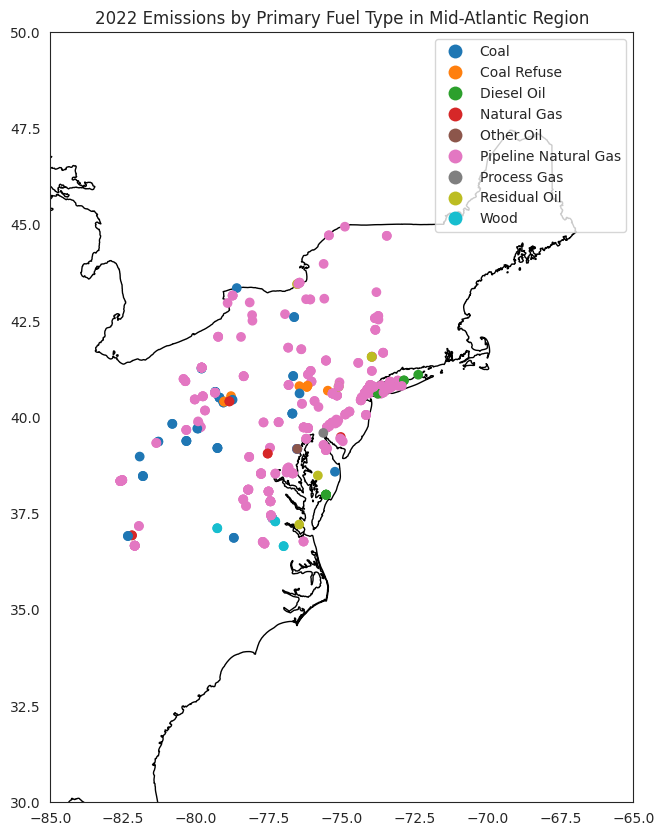

In [ ]:
# Restrict to the lower 48
lower48 = nation.loc[~nation['NAME'].isin(['Alaska', 'Hawaii'])]

# Plot the lower 48
fig, ax = plt.subplots(1,1, figsize=(10, 10))
lower48.plot(ax=ax, color='white', edgecolor='black')

# Plot 2022 emissions points, colored by primary_fuel_type
ma_emissions_geo.query("date == '2022-08'").plot(ax=ax, column='primary_fuel_type', legend=True)

# Set the x and y limits of the plot to focus on the Mid-Atlantic Region
ax.set_xlim([-85, -65])
ax.set_ylim([30, 50])

# Add a title to the plot
ax.set_title('2022 Emissions by Primary Fuel Type in Mid-Atlantic Region')

# Show the plot
plt.show()

<div style="background-color:#f2d7d5">
    
For the same plot, examine year 2000 rather than 2022. Comment on the differences you are seeing.
    

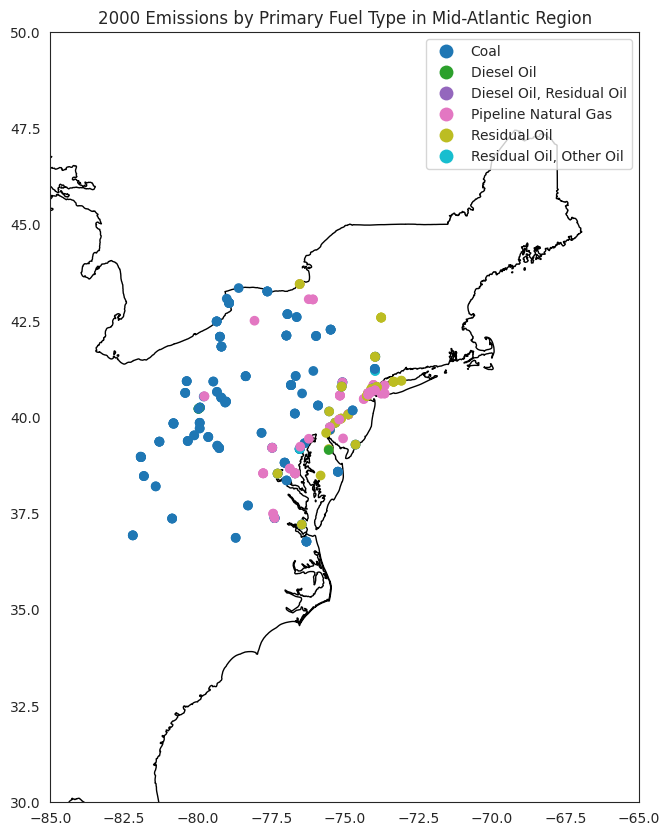

In [ ]:
#Restrict to the lower 48
lower48 = nation.loc[~nation['NAME'].isin(['Alaska', 'Hawaii'])]

#Plot the lower 48
fig, ax = plt.subplots(1,1, figsize=(10, 10))
lower48.plot(ax=ax, color='white', edgecolor='black')

# Plot 2000 emissions points, colored by primary_fuel_type
ma_emissions_geo.query("date == '2000-08'").plot(ax=ax, column='primary_fuel_type', legend=True)

#Set the x and y limits of the plot to focus on the Mid-Atlantic Region
ax.set_xlim([-85, -65])
ax.set_ylim([30, 50])

# Add a title to the plot
ax.set_title('2000 Emissions by Primary Fuel Type in Mid-Atlantic Region')

# Show the plot
plt.show()

There is a lot more natural gas present in 2022 as opposed to a lot more coal and oil in 2000. This makes sense as there has been a much larger push for cleaner emissions in the past 20 years or so.

<div style="background-color:#f2d7d5">
    
Using the county-level map (`cb_2018_us_county_5m.shp`), focus in on Virginia (`STATEFPS` is 51) and plot the facilities by primary fuel type for August 2022 and 2000. Include titles so a reader can tell the time periods apart. Try to scale the size of the points based on the `gross_load_mwh/1000` (amount of electricity produced).  What has changed? 

In [ ]:
counties = gpd.read_file('./data/cb_2018_us_county_5m.shp')

#prep for merging
counties['STATEFP'] = counties['STATEFP'].astype(float)
counties['COUNTYFP'] = counties['COUNTYFP'].astype(float)

#get just VA counties
va_counties = counties[counties.STATEFP == 51]

In [ ]:
#get fips codes so we can merge emissions to counties on fips
fips = pd.read_csv('http://www2.census.gov/geo/docs/reference/codes/files/national_county.txt',
                         names=['state','state_fips','county_fips','county','fips_class_code'],
                         header=None)

In [ ]:
#get August 2022 dates
geo_2022 = emissions_geo.query("date == '2022-08'")

In [ ]:
#merge fips codes into August 2022 dates
fuel_2022_fips = geo_2022.merge(fips, how = 'left', on = 'state')

In [ ]:
#merge fips August 2022 dates into VA counties
counties_plot = va_counties.merge(fuel_2022_fips, how = 'right', left_on = ['STATEFP','COUNTYFP', 'geometry'], right_on = ['state_fips','county_fips', 'geometry'], indicator = 'merges')

In [ ]:
#get just Virginia
va_counties_plot = counties_plot.query("state_fips == 51")

In [ ]:
#Get counts of fuel type by facility
vac_plot = va_counties_plot[['facility_id','primary_fuel_type']].value_counts().reset_index()

In [ ]:
#rename column to count
vac_plot.rename(columns = {0: 'count'}, inplace = True)

In [ ]:
#merge facility emissions data back into data with geometry points
final_plot_2022 = va_counties_plot.merge(vac_plot, how = 'left', left_on = ['facility_id','primary_fuel_type'], right_on = ['facility_id','primary_fuel_type'], indicator = 'merger')

In [ ]:
#Do the same thing for August 2000

#get August 2000 dates
geo_2000 = emissions_geo.query("date == '2000-08'")

#merge fips codes into August 2000 dates
fuel_2000_fips = geo_2000.merge(fips, how = 'left', on = 'state')

#merge fips August 2000 dates into VA counties
counties_plot = va_counties.merge(fuel_2000_fips, how = 'right', left_on = ['STATEFP','COUNTYFP', 'geometry'], right_on = ['state_fips','county_fips', 'geometry'], indicator = '2000_merges')

#get just Virginia
va_counties_plot = counties_plot.query("state_fips == 51")

#Get counts of fuel type by facility
vac_plot = va_counties_plot[['facility_id','primary_fuel_type']].value_counts().reset_index()

#rename column to count
vac_plot.rename(columns = {0: 'count'}, inplace = True)

#merge geometry data back into
final_plot_2000 = va_counties_plot.merge(vac_plot, how = 'left', left_on = ['facility_id','primary_fuel_type'], right_on = ['facility_id','primary_fuel_type'], indicator = '2000_merger')

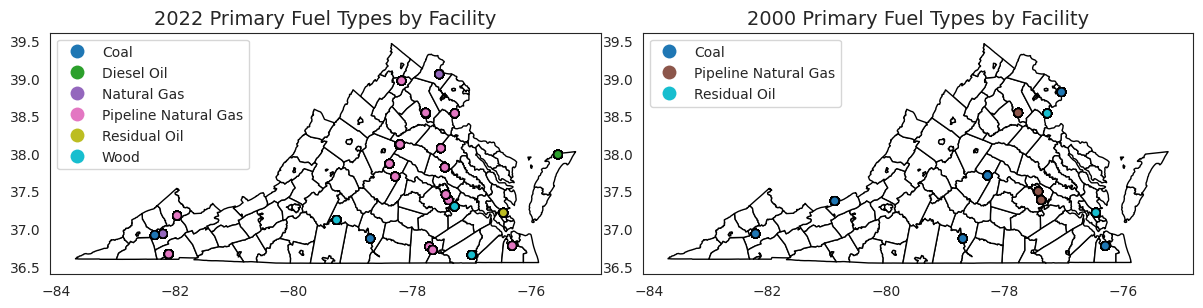

In [ ]:
#Create 2 subplots for each year
fig, (ax_2022, ax_2000) = plt.subplots(1,2, figsize=(12,5))

#plot VA counties
va_counties.plot(edgecolor='black', color='white', ax = ax_2022, legend=True)
va_counties.plot(edgecolor='black', color='white', ax = ax_2000, legend=True)

#plot fuel type points onto VA counties
final_plot_2022.plot(column='primary_fuel_type', edgecolor='black',legend=True, ax = ax_2022)
final_plot_2000.plot(column='primary_fuel_type', edgecolor='black',legend=True, ax = ax_2000)

#set titles
ax_2022.set_title('2022 Primary Fuel Types by Facility', fontsize=14)
ax_2000.set_title('2000 Primary Fuel Types by Facility', fontsize=14)

#clean up
plt.tight_layout()

#show
plt.show()

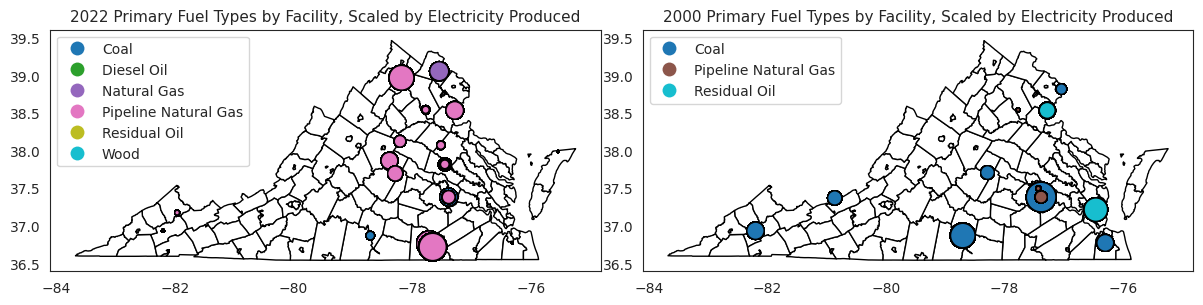

In [ ]:
#Create 2 subplots for each year, scaled by electricity use of emissions
fig, (ax_2022_scaled, ax_2000_scaled) = plt.subplots(1,2, figsize=(12,5))

#plot VA counties
va_counties.plot(edgecolor='black', color='white', ax = ax_2022_scaled, legend=True)
va_counties.plot(edgecolor='black', color='white', ax = ax_2000_scaled, legend=True)

#plot scaled fuel type points onto VA counties
final_plot_2022.plot(column='primary_fuel_type', edgecolor='black',legend=True, ax = ax_2022_scaled, s=final_plot_2022['gross_load_mwh'] * 0.001)
final_plot_2000.plot(column='primary_fuel_type', edgecolor='black',legend=True, ax = ax_2000_scaled, s=final_plot_2000['gross_load_mwh'] * 0.001)

#set titles
ax_2022_scaled.set_title('2022 Primary Fuel Types by Facility, Scaled by Electricity Produced', fontsize=11)
ax_2000_scaled.set_title('2000 Primary Fuel Types by Facility, Scaled by Electricity Produced', fontsize=11)

#clean up
plt.tight_layout()

#show
plt.show()

**What has changed?**

The ability to scale our results by how much electricity each fuel type produces allows us to draw some conclusions. One glaring one is how much more emphasized pipeline natural gas is in 2022(pink) as compared to 2000(brown). There were still multiple spots utilizing pipeline natural gas in 2000, but scaling has showed us that it isn't even close to the amount being produced in 2022. You can also clearly see the coal hotspots from the 2000 graph almost entirely disappear and be replaced by natural gases. This again reflects the more environmentally friendly approach adopted by the country in recent years
